In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras import datasets , layers , models

In [3]:
(X_train , y_train) , (X_test , y_test) = datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train = X_train /255
X_test = X_test /255

In [7]:
X_train = X_train.reshape(60000 , 28 , 28 ,1)
X_test=X_test.reshape(10000,28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [29]:
classes = ["T-shirt/top" , "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle boot"]

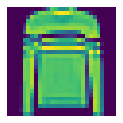

In [11]:
plt.figure(figsize=(15,2))
plt.axis("off")
plt.imshow(X_train[5])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size=3 , padding="SAME" , activation="relu" , input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64 , kernel_size=3  , padding="SAME" , activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128 , kernel_size=3 , padding="SAME" , activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation="relu"),
    keras.layers.Dense(64 , activation="relu"),
    keras.layers.Dense(10 , activation="softmax"),
])

In [15]:
model.compile(optimizer="adam" , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])
model.fit(X_train , y_train , epochs=10 , validation_split=0.1 , callbacks=[keras.callbacks.EarlyStopping(patience=5 , restore_best_weights=True)])

Epoch 1/10
1688/1688 [==============================] - 56s 32ms/step - loss: 0.4676 - accuracy: 0.8267 - val_loss: 0.3391 - val_accuracy: 0.8725
Epoch 2/10
1688/1688 [==============================] - 55s 32ms/step - loss: 0.2957 - accuracy: 0.8911 - val_loss: 0.2751 - val_accuracy: 0.9005
Epoch 3/10
1688/1688 [==============================] - 55s 32ms/step - loss: 0.2482 - accuracy: 0.9102 - val_loss: 0.2413 - val_accuracy: 0.9095
Epoch 4/10
1688/1688 [==============================] - 55s 32ms/step - loss: 0.2158 - accuracy: 0.9195 - val_loss: 0.2519 - val_accuracy: 0.9043
Epoch 5/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.1922 - accuracy: 0.9280 - val_loss: 0.2488 - val_accuracy: 0.9132
Epoch 6/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.1727 - accuracy: 0.9364 - val_loss: 0.2233 - val_accuracy: 0.9193
Epoch 7/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.1514 - accuracy: 0.9428 - val_loss: 0.2159 -

In [16]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2833 - accuracy: 0.9124


[0.2832971513271332, 0.9124000072479248]

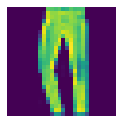

In [17]:
plt.figure(figsize=(15,2))
plt.axis("off")
plt.imshow(X_test[5])
plt.show()

In [18]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [19]:
score = tf.nn.softmax(predictions)

In [21]:
np.argmax(score[5])

1

In [23]:
np.argmax(tf.nn.softmax(predictions[5]))

1

In [22]:
y_test[5]

1

In [26]:
y_test[8]

5

In [27]:
np.argmax(score[8])

5

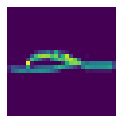

In [28]:
plt.figure(figsize=(15,2))
plt.axis("off")
plt.imshow(X_test[8])
plt.show()

In [30]:
y_classes= [np.argmax(element) for element in predictions]
y_classes[:5]

[9, 2, 1, 1, 6]

In [31]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [33]:
classes[y_classes[5]]

'Trouser'

In [34]:
classes[y_classes[8]]

'Sandal'